## Versuch 251 Auswertung

### Jannik Fuchs und Marius Mangold

#### am 13.12.2021

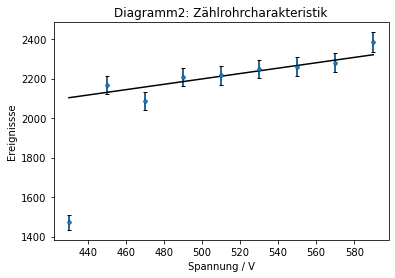

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Zaehlrohrspannung:
U=np.array([430,450,470,490,510,530,550,570,590])
#gezaehlte Ereignisse
N=np.array([1472,2167,2089,2209,2217,2249,2260,2281,2386])
Fehler_N=np.sqrt(N)

plt.errorbar(U, N, Fehler_N, fmt=".", c = "k", barsabove = False, capsize = 2)
plt.xlabel("Spannung / V")
plt.ylabel("Ereignissse")
plt.title("Zaehlrohrcharakteristik")

#Nun wird eine lineare Funktion an die Messwerte ab dem 2. bis zum vorletzten Datenpunkt angefittet
def linear(x,a,b): 
    return a*x+b
popt, pcov=curve_fit(linear, U[1:7], N[1:7])
plt.errorbar(U, N, Fehler_N, fmt=".")
plt.xlabel('Spannung / V')
plt.ylabel("Ereignissse")
plt.title("Diagramm2: Zählrohrcharakteristik")
plt.plot(U, linear(U,*popt), c = "k")
plt.savefig("Zählrohrcharakteristik.pdf", format="pdf")

Gaussfit:
A= 1938.09950857238 , Standardfehler= 62.03128253266144
mu_g= 70.32286128821674 , Standardfehler= 0.26135741471557355
sig= 7.831944489396239 , Standardfehler= 0.19237049138156412
Poissonfit:
Ap= 1946.1296990975309 , Standardfehler= 63.00756144594182
mu_p= 70.50453689327122 , Standardfehler= 0.26964645324525816


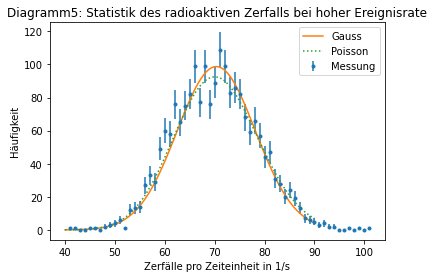

In [2]:
#Nun wird die Messung mit hoher Rate geplottet, und durch Gauss- und Poisson-Verteilung angenähert:
anzahl, häufigkeit =np.loadtxt("2000Messungen.dat", unpack = True)
fehler = np.sqrt(häufigkeit)

def gaussian (x, A_g, mu_g, sig) : #A: Fläche der Gaussfunktion
    return A_g/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu_g)**2/2/sig**2)

from scipy.special import gamma
def poisson (x ,A_p, mu_p) :
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

#Nun werden Gaussfunktion (Index g) und Poissonverteilung (Index p) an die Messdaten ab 10-fachem Auftreten angefittet
popt_g, pcov_g = curve_fit(gaussian, anzahl[8: -11], häufigkeit [8: -11]
                           , p0 =[2000,75,8], sigma = fehler[8:-11])

popt_p, pcov_p = curve_fit(poisson, anzahl[8:-11], häufigkeit [8:-11],
                          p0=[2000,75], sigma = fehler[8:-11])

plt.errorbar(anzahl, häufigkeit, fehler, fmt=".", label = "Messung")
plt.xlabel("Zerfälle pro Zeiteinheit in 1/s")
plt.ylabel('Häufigkeit')
plt.title('Diagramm5: Statistik des radioaktiven Zerfalls bei hoher Ereignisrate')
x=np.linspace(40,90,100)
plt.plot(x, gaussian(x,*popt_g), label = "Gauss")
plt.plot(x, poisson(x,*popt_p), label = "Poisson", linestyle=":")
plt.legend()
plt.savefig("hoheRate.pdf", format = "pdf")

print("Gaussfit:")
print ("A=", popt_g[0], ", Standardfehler=", np.sqrt(pcov_g[0][0]))
print ("mu_g=", popt_g[1], ", Standardfehler=", np.sqrt(pcov_g[1][1]))
print ("sig=", popt_g[2], ", Standardfehler=", np.sqrt(pcov_g[2][2]))
print ("Poissonfit:")
print ("Ap=", popt_p[0], ", Standardfehler=", np.sqrt(pcov_p[0][0]))
print ("mu_p=", popt_p[1], ", Standardfehler=", np.sqrt(pcov_p[1][1]))

In [28]:
#Berechnung der Chi-Werte als Maß der Güte der Fits
#Gauss:
chi2_g=np.sum((gaussian(anzahl[8:-11],*popt_g) -häufigkeit[8:-11])**2/fehler[8:-11]**2)
dof_g=len(anzahl[8:-11])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi Gauss hoheRate =", chi2_g)
print("chi reduziert Gauss hoheRate =",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[8:-11],*popt_p)
-häufigkeit[8:-11])**2/fehler[8:-11]**2)
dof_p=len(anzahl[8:-11])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi Poisson hoheRate =", chi2_p)
print("chi reduziert Poisson hoheRate =",chi2_red_p)
#Berechnung der Fitwahrscheinlichkeiten
from scipy.stats import chi2
print("Fitwahrscheinlichkeiten")
#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss hoheRate=", prob_g,"%")
print("Wahrscheinlichkeit Poisson hoheRate=", prob_p,"%")

chi Gauss hoheRate = 35.44046637364291
chi reduziert Gauss hoheRate = 1.1432408507626746
chi Poisson hoheRate = 35.88663410011728
chi reduziert Poisson hoheRate = 1.121457315628665
Fitwahrscheinlichkeiten
Wahrscheinlichkeit Gauss hoheRate= 27.0 %
Wahrscheinlichkeit Poisson hoheRate= 28.999999999999996 %


Gaussfit:
A= 9838.551426726328 , Standardfehler= 446.77226187914806
mu_g= 4.88765015414593 , Standardfehler= 0.1010286865882455
sig= 2.163601878906233 , Standardfehler= 0.07694290820946116
Poissonfit:
Ap= 9992.15107134776 , Standardfehler= 64.73520971765423
mu_p= 4.925822308130008 , Standardfehler= 0.014491109838808738


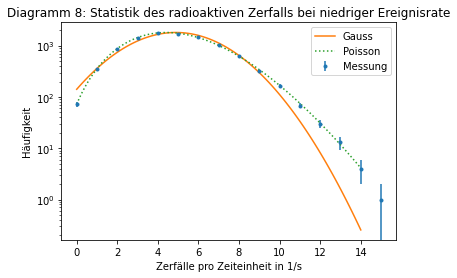

In [3]:
#Nun wird die Messung mit niedriger Rate geplottet, und durch Gauss- und Poisson-Verteilung angenähert:
anzahl, häufigkeit =np.loadtxt("10000Messungen.dat", unpack = True)
fehler = np.sqrt(häufigkeit)

def gaussian (x, A_g, mu_g, sig) : #A: Fläche der Gaussfunktion
    return A_g/(np.sqrt(2*np.pi)*sig)*np.exp(-(x-mu_g)**2/2/sig**2)

from scipy.special import gamma
def poisson (x ,A_p, mu_p) :
    return A_p*np.exp(-mu_p)*mu_p**x/gamma(x+1)

#Erneut werden Gaussfunktion (Index g) und Poissonverteilung (Index p) an die Messdaten ab 10-fachem Auftreten angefittet
popt_g, pcov_g = curve_fit(gaussian, anzahl[0: -3], häufigkeit [0: -3]
                           , p0 =[4900,5,2.1], sigma = fehler[0:-3])

popt_p, pcov_p = curve_fit(poisson, anzahl[0:-3], häufigkeit [0:-3],
                          p0=[5000,5], sigma = fehler[0:-3])

plt.errorbar(anzahl, häufigkeit, fehler, fmt=".", label = "Messung")
plt.xlabel("Zerfälle pro Zeiteinheit in 1/s")
plt.ylabel('Häufigkeit')
plt.title('Diagramm 8: Statistik des radioaktiven Zerfalls bei niedriger Ereignisrate')
x=np.linspace(0,14,100)
plt.yscale('log')
plt.plot(x, gaussian(x,*popt_g), label = "Gauss")
plt.plot(x, poisson(x,*popt_p), label = "Poisson", linestyle=":")
plt.legend()
plt.savefig("niedrigeRate.pdf", format = "pdf")

print("Gaussfit:")
print ("A=", popt_g[0], ", Standardfehler=", np.sqrt(pcov_g[0][0]))
print ("mu_g=", popt_g[1], ", Standardfehler=", np.sqrt(pcov_g[1][1]))
print ("sig=", popt_g[2], ", Standardfehler=", np.sqrt(pcov_g[2][2]))
print ("Poissonfit:")
print ("Ap=", popt_p[0], ", Standardfehler=", np.sqrt(pcov_p[0][0]))
print ("mu_p=", popt_p[1], ", Standardfehler=", np.sqrt(pcov_p[1][1]))

In [32]:
#Berechnung der Chi-Werte als Maß der Güte der Fits
#Gauss:
chi2_g=np.sum((gaussian(anzahl[0:-3],*popt_g) -häufigkeit[0:-3])**2/fehler[0:-3]**2)
dof_g=len(anzahl[0:-3])-3 #dof:degrees of freedom, Freiheitsgrad
chi2_red_g=chi2_g/dof_g
print("chi Gauss niedrigeRate=", chi2_g)
print("chi reduziert Gauss niedrigeRate=",chi2_red_g)
#Poisson:
chi2_p=np.sum((poisson(anzahl[0:-3],*popt_p)
-häufigkeit[0:-3])**2/fehler[0:-3]**2)
dof_p=len(anzahl[0:-3])-2 #poisson hat nur 2 Parameter
chi2_red_p=chi2_p/dof_p
print("chi Poisson niedrigeRate =", chi2_p)
print("chi reduziert Poisson niedrigeRate =",chi2_red_p)

#Berechnung der Fitwahrscheinlichkeiten
from scipy.stats import chi2
print("Fitwahrscheinlichkeiten")
#Gauss:
prob_g=round(1-chi2.cdf(chi2_g,dof_g),2)*100
#Poisson:
prob_p=round(1-chi2.cdf(chi2_p,dof_p),2)*100
print("Wahrscheinlichkeit Gauss niedrigeRate=", prob_g,"%")
print("Wahrscheinlichkeit Poisson niedrigeRate=", prob_p,"%")

chi Gauss niedrigeRate= 112.32646410522828
chi reduziert Gauss niedrigeRate= 11.232646410522829
chi Poisson niedrigeRate = 8.28399915250632
chi reduziert Poisson niedrigeRate = 0.7530908320460291
Fitwahrscheinlichkeiten
Wahrscheinlichkeit Gauss niedrigeRate= 0.0 %
Wahrscheinlichkeit Poisson niedrigeRate= 69.0 %


In [17]:
3.9/1.3

3.0